## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0722 22:43:46.450343 4646499776 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0722 22:43:46.452790 4646499776 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0722 22:43:46.477438 4646499776 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 22:43:46.478362 4646499776 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.comp

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0722 22:43:46.737676 4646499776 deprecation.py:323] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.1717 - acc: 0.1735 - val_loss: 2.0202 - val_acc: 0.2228
Epoch 2/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.9746 - acc: 0.2614 - val_loss: 1.9534 - val_acc: 0.2752
Epoch 3/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.8439 - acc: 0.3182 - val_loss: 1.7986 - val_acc: 0.3466
Epoch 4/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.7997 - acc: 0.3404 - val_loss: 1.7874 - val_acc: 0.3444
Epoch 5/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.7753 - acc: 0.3527 - val_loss: 1.8477 - val_acc: 0.3249
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.7443 - acc: 0.3669 - val_loss: 1.8262 - val_acc: 0.3270
Epoch 7/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.7209 - acc: 0.3783 - val_loss: 1.7340 - 

Epoch 2/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5979 - acc: 0.4331 - val_loss: 1.6362 - val_acc: 0.4213
Epoch 3/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.5081 - acc: 0.4654 - val_loss: 1.5152 - val_acc: 0.4570
Epoch 4/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4487 - acc: 0.4852 - val_loss: 1.5765 - val_acc: 0.4415
Epoch 5/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.3998 - acc: 0.5024 - val_loss: 1.4678 - val_acc: 0.4796acc: 0.5
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.3666 - acc: 0.5173 - val_loss: 1.4452 - val_acc: 0.4804
Epoch 7/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.3228 - acc: 0.5307 - val_loss: 1.4897 - val_acc: 0.4772
Epoch 8/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.2926 - acc: 0.5401 - val_loss: 1.4666 - val_acc: 0.4785
Epoch 9/50
50000/50000 [===

50000/50000 [==============================] - 5s 106us/step - loss: 1.7283 - acc: 0.3946 - val_loss: 1.7103 - val_acc: 0.4034
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6661 - acc: 0.4170 - val_loss: 1.6461 - val_acc: 0.4255
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.6149 - acc: 0.4353 - val_loss: 1.6050 - val_acc: 0.4366
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5747 - acc: 0.4500 - val_loss: 1.5715 - val_acc: 0.4447
Epoch 7/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5410 - acc: 0.4597 - val_loss: 1.5449 - val_acc: 0.4539
Epoch 8/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.5098 - acc: 0.4714 - val_loss: 1.5340 - val_acc: 0.4598
Epoch 9/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.4812 - acc: 0.4799 - val_loss: 1.5102 - val_acc: 0.4672
Epoch 10/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 103us/step - loss: 1.9707 - acc: 0.3132 - val_loss: 1.9483 - val_acc: 0.3191
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.9314 - acc: 0.3260 - val_loss: 1.9152 - val_acc: 0.3298
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.9010 - acc: 0.3348 - val_loss: 1.8900 - val_acc: 0.3359
Epoch 7/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.8770 - acc: 0.3425 - val_loss: 1.8674 - val_acc: 0.3443
Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.8565 - acc: 0.3493 - val_loss: 1.8489 - val_acc: 0.3515
Epoch 9/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8397 - acc: 0.3561 - val_loss: 1.8323 - val_acc: 0.3588
Epoch 10/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8237 - acc: 0.3625 - val_loss: 1.8187 - val_acc: 0.3601
Epoch 11/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 101us/step - loss: 2.2531 - acc: 0.1637 - val_loss: 2.2466 - val_acc: 0.1724
Epoch 6/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.2400 - acc: 0.1778 - val_loss: 2.2342 - val_acc: 0.1851
Epoch 7/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.2277 - acc: 0.1922 - val_loss: 2.2222 - val_acc: 0.1944
Epoch 8/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.2157 - acc: 0.2011 - val_loss: 2.2106 - val_acc: 0.2040
Epoch 9/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.2041 - acc: 0.2110 - val_loss: 2.1992 - val_acc: 0.2123
Epoch 10/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1925 - acc: 0.2184 - val_loss: 2.1877 - val_acc: 0.2190
Epoch 11/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.1810 - acc: 0.2244 - val_loss: 2.1765 - val_acc: 0.2237
Epoch 12/50
50000/50000 [==================

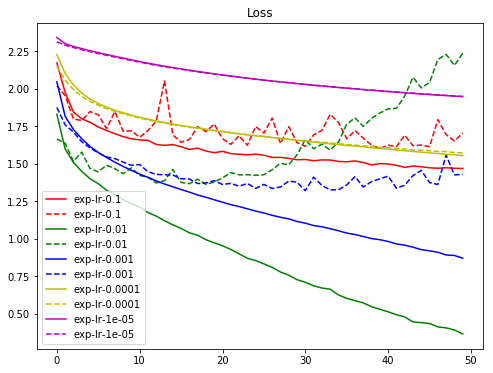

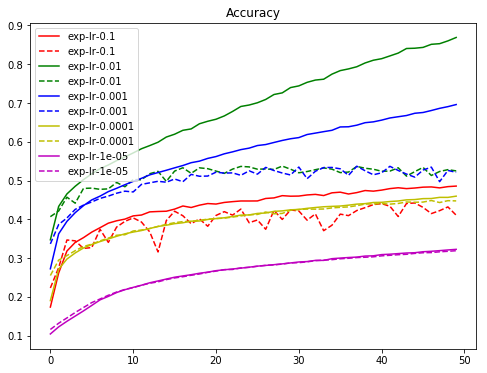

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現